In [1]:
# Euler & Milstein
# dX_t= b X_t dt+ sigma dW_t
import numpy as np
import matplotlib.pyplot as plt

T=1;b=-2;sigma=1
mc=10000
Err_strong=[]
Err_weak=[]

Winc=np.sqrt(2**(-10))*np.random.randn(mc,2**(10))
k=2**(-10)
Y=0
for i in range (2**(10)):
    Y += np.exp(-b*k*i)*Winc[:,i]
X_true= np.exp(b*T)*(np.ones(mc) + sigma*Y)

print(np.mean(X_true),np.var(X_true))
print(np.exp(-2),0.25*(1-np.exp(-4)))


k1= 2**(-10)
X_LT=np.ones(mc)
for i in range (2**(10)):
    X_LT+= b*X_LT*k1+ sigma*Winc[:,i]
X1= abs(X_true- X_LT)
Y1= abs(np.mean(X_true,0)-np.mean(X_LT,0))
Err_strong.append(np.mean(X1,0))
Err_weak.append(Y1)


k2=2**(-9)
X_LT=np.ones(mc)
Winc1= np.zeros((mc,2**(9)))
for d in range(2**(9)):
    for j in range(mc):
        Winc1[j,d]=np.sum(Winc[j,:][range(2*d,2*(d+1))])
    X_LT+= b*X_LT*k2+ sigma*Winc1[:,d]
X2= abs(X_true- X_LT)
Y2= abs(np.mean(X_true,0)-np.mean(X_LT,0))
Err_strong.append(np.mean(X2,0))
Err_weak.append(Y2)

k3=2**(-8)
X_LT=np.ones(mc)
Winc2= np.zeros((mc,2**(8)))
for d in range(2**(8)):
    for j in range(mc):
        Winc2[j,d]=np.sum(Winc[j,:][range(4*d,4*(d+1))])
    X_LT+= b*X_LT*k3+ sigma*Winc2[:,d]
X3= abs(X_true- X_LT)
Y3= abs(np.mean(X_true,0)-np.mean(X_LT,0))
Err_strong.append(np.mean(X3,0)) 
Err_weak.append(Y3)

k4=2**(-7)
X_LT=np.ones(mc)
Winc3= np.zeros((mc,2**(7)))
for d in range(2**(7)):
    for j in range(mc):
        Winc3[j,d]=np.sum(Winc[j,:][range(8*d,8*(d+1))])
    X_LT+= b*X_LT*k4+ sigma*Winc3[:,d]
X4= abs(X_true- X_LT)
Y4= abs(np.mean(X_true,0)-np.mean(X_LT,0))
Err_strong.append(np.mean(X4,0)) 
Err_weak.append(Y4)


0.1440815751641101 0.2447528125687466
0.1353352832366127 0.24542109027781644


In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [4]:
h = np.array(Dt).reshape(-1,1)
reg1 = LinearRegression().fit(np.log(h), np.log(Err_strong))
reg2 = LinearRegression().fit(np.log(h), np.log(Err_weak))

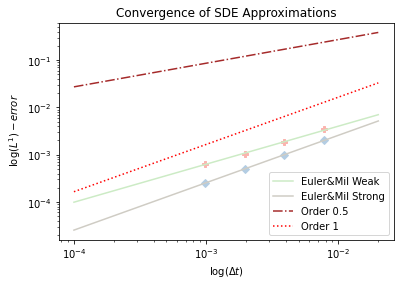

In [8]:
pal = ["#FBB4AE","#B3CDE3", "#CCEBC5","#CFCCC4"]
Dt=[2**(-10),2**(-9),2**(-8),2**(-7)]
plt.loglog(Dt , Err_strong ,'P', color=pal[0])
plt.loglog(Dt , Err_weak,'D', color=pal[1])

x=np.linspace(0.0001,0.02)
#y=(reg1.coef_[0])*x + reg1.intercept_
y = np.exp(reg1.intercept_) * x**reg1.coef_
z = np.exp(reg2.intercept_) * x**reg2.coef_
s = np.exp(1) * x**(0.5)
r = np.exp(0.5) * x**(1)
plt.loglog(x, y, color=pal[2], label='Euler&Mil Weak')
plt.loglog(x, z, color=pal[3], label='Euler&Mil Strong')
plt.loglog(x, s, 'g-.' , color='brown', label='Order 0.5')
plt.loglog(x, r, ':' , color='red', label= 'Order 1')


plt.title('Convergence of SDE Approximations')
plt.xlabel('$\log(\Delta t)$'); plt.ylabel(' $\log(L^{1})-error$');plt.legend(loc=4)

plt.show()     
    

In [9]:
# LT- dtdw
# dX_t= b X_t dt+ sigma dW_t
import numpy as np
import matplotlib.pyplot as plt

T=1;b=-2;sigma=1
mc=10000
Err_strong=[]
Err_weak=[]

Winc=np.sqrt(2**(-10))*np.random.randn(mc,2**(10))
k=2**(-10)
Y=0
for i in range (2**(10)):
    Y += np.exp(-b*k*i)*Winc[:,i]
X_true= np.exp(b*T)*(np.ones(mc) + sigma*Y)

print(np.mean(X_true),np.var(X_true))
print(np.exp(-2),0.25*(1-np.exp(-4)))


k1= 2**(-10)
X_LT=np.ones(mc)
for i in range (2**(10)):
    X_LT+= b*X_LT*k1
    X_LT+= sigma*Winc[:,i]
X1= abs(X_true- X_LT)
Y1= abs(np.mean(X_true,0)-np.mean(X_LT,0))
Err_strong.append(np.mean(X1,0))
Err_weak.append(Y1)


k2=2**(-9)
X_LT=np.ones(mc)
Winc1= np.zeros((mc,2**(9)))
for d in range(2**(9)):
    for j in range(mc):
        Winc1[j,d]=np.sum(Winc[j,:][range(2*d,2*(d+1))])
    X_LT+= b*X_LT*k2
    X_LT+= sigma*Winc1[:,d]
X2= abs(X_true- X_LT)
Y2= abs(np.mean(X_true,0)-np.mean(X_LT,0))
Err_strong.append(np.mean(X2,0))
Err_weak.append(Y2)

k3=2**(-8)
X_LT=np.ones(mc)
Winc2= np.zeros((mc,2**(8)))
for d in range(2**(8)):
    for j in range(mc):
        Winc2[j,d]=np.sum(Winc[j,:][range(4*d,4*(d+1))])
    X_LT+= b*X_LT*k3
    X_LT+= sigma*Winc2[:,d]
X3= abs(X_true- X_LT)
Y3= abs(np.mean(X_true,0)-np.mean(X_LT,0))
Err_strong.append(np.mean(X3,0)) 
Err_weak.append(Y3)

k4=2**(-7)
X_LT=np.ones(mc)
Winc3= np.zeros((mc,2**(7)))
for d in range(2**(7)):
    for j in range(mc):
        Winc3[j,d]=np.sum(Winc[j,:][range(8*d,8*(d+1))])
    X_LT+= b*X_LT*k4
    X_LT+= sigma*Winc3[:,d]
X4= abs(X_true- X_LT)
Y4= abs(np.mean(X_true,0)-np.mean(X_LT,0))
Err_strong.append(np.mean(X4,0)) 
Err_weak.append(Y4)

0.13517330510125142 0.2399792633935971
0.1353352832366127 0.24542109027781644


In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [11]:
h = np.array(Dt).reshape(-1,1)
reg1 = LinearRegression().fit(np.log(h), np.log(Err_strong))
reg2 = LinearRegression().fit(np.log(h), np.log(Err_weak))

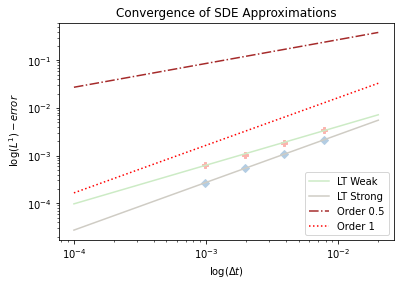

In [13]:
pal = ["#FBB4AE","#B3CDE3", "#CCEBC5","#CFCCC4"]
Dt=[2**(-10),2**(-9),2**(-8),2**(-7)]
plt.loglog(Dt , Err_strong ,'P', color=pal[0])
plt.loglog(Dt , Err_weak,'D', color=pal[1])

x=np.linspace(0.0001,0.02)
#y=(reg1.coef_[0])*x + reg1.intercept_
y = np.exp(reg1.intercept_) * x**reg1.coef_
z = np.exp(reg2.intercept_) * x**reg2.coef_
s = np.exp(1) * x**(0.5)
r = np.exp(0.5) * x**(1)
plt.loglog(x, y, color=pal[2], label='LT Weak')
plt.loglog(x, z, color=pal[3], label='LT Strong')
plt.loglog(x, s, 'g-.' , color='brown', label='Order 0.5')
plt.loglog(x, r, ':' , color='red', label= 'Order 1')


plt.title('Convergence of SDE Approximations')
plt.xlabel('$\log(\Delta t)$'); plt.ylabel(' $\log(L^{1})-error$');plt.legend(loc=4)

plt.show()     
    

In [14]:
# LT - dwdt
# dX_t= b X_t dt+ sigma dW_t
import numpy as np
import matplotlib.pyplot as plt

T=1;b=-2;sigma=1
mc=10000
Err_strong=[]
Err_weak=[]

Winc=np.sqrt(2**(-10))*np.random.randn(mc,2**(10))
k=2**(-10)
Y=0
for i in range (2**(10)):
    Y += np.exp(-b*k*i)*Winc[:,i]
X_true= np.exp(b*T)*(np.ones(mc) + sigma*Y)

print(np.mean(X_true),np.var(X_true))
print(np.exp(-2),0.25*(1-np.exp(-4)))


k1= 2**(-10)
X_LT=np.ones(mc)
for i in range (2**(10)):
    X_LT+= sigma*Winc[:,i]
    X_LT+= b*X_LT*k1
X1= abs(X_true- X_LT)
Y1= abs(np.mean(X_true,0)-np.mean(X_LT,0))
Err_strong.append(np.mean(X1,0))
Err_weak.append(Y1)


k2=2**(-9)
X_LT=np.ones(mc)
Winc1= np.zeros((mc,2**(9)))
for d in range(2**(9)):
    for j in range(mc):
        Winc1[j,d]=np.sum(Winc[j,:][range(2*d,2*(d+1))])
    X_LT+= sigma*Winc1[:,d]
    X_LT+= b*X_LT*k2
X2= abs(X_true- X_LT)
Y2= abs(np.mean(X_true,0)-np.mean(X_LT,0))
Err_strong.append(np.mean(X2,0))
Err_weak.append(Y2)

k3=2**(-8)
X_LT=np.ones(mc)
Winc2= np.zeros((mc,2**(8)))
for d in range(2**(8)):
    for j in range(mc):
        Winc2[j,d]=np.sum(Winc[j,:][range(4*d,4*(d+1))])
    X_LT+= sigma*Winc2[:,d]
    X_LT+= b*X_LT*k3
X3= abs(X_true- X_LT)
Y3= abs(np.mean(X_true,0)-np.mean(X_LT,0))
Err_strong.append(np.mean(X3,0)) 
Err_weak.append(Y3)

k4=2**(-7)
X_LT=np.ones(mc)
Winc3= np.zeros((mc,2**(7)))
for d in range(2**(7)):
    for j in range(mc):
        Winc3[j,d]=np.sum(Winc[j,:][range(8*d,8*(d+1))])
    X_LT+= sigma*Winc3[:,d]
    X_LT+= b*X_LT*k4
X4= abs(X_true- X_LT)
Y4= abs(np.mean(X_true,0)-np.mean(X_LT,0))
Err_strong.append(np.mean(X4,0)) 
Err_weak.append(Y4)


0.13863910045262054 0.25078333366320427
0.1353352832366127 0.24542109027781644


In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [16]:
h = np.array(Dt).reshape(-1,1)
reg1 = LinearRegression().fit(np.log(h), np.log(Err_strong))
reg2 = LinearRegression().fit(np.log(h), np.log(Err_weak))

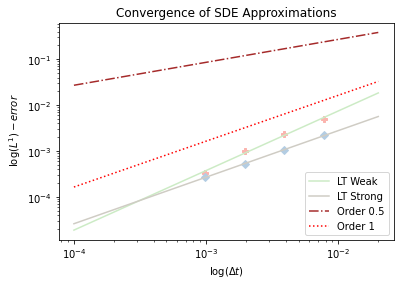

In [17]:
pal = ["#FBB4AE","#B3CDE3", "#CCEBC5","#CFCCC4"]
Dt=[2**(-10),2**(-9),2**(-8),2**(-7)]
plt.loglog(Dt , Err_strong ,'P', color=pal[0])
plt.loglog(Dt , Err_weak,'D', color=pal[1])

x=np.linspace(0.0001,0.02)
#y=(reg1.coef_[0])*x + reg1.intercept_
y = np.exp(reg1.intercept_) * x**reg1.coef_
z = np.exp(reg2.intercept_) * x**reg2.coef_
s = np.exp(1) * x**(0.5)
r = np.exp(0.5) * x**(1)
plt.loglog(x, y, color=pal[2], label='LT Weak')
plt.loglog(x, z, color=pal[3], label='LT Strong')
plt.loglog(x, s, 'g-.' , color='brown', label='Order 0.5')
plt.loglog(x, r, ':' , color='red', label= 'Order 1')


plt.title('Convergence of SDE Approximations')
plt.xlabel('$\log(\Delta t)$'); plt.ylabel(' $\log(L^{1})-error$');plt.legend(loc=4)

plt.show()     

In [18]:
# Strang
import numpy as np
import matplotlib.pyplot as plt

T=1;b=-2;sigma=1
mc=10000
Err_strong=[]
Err_weak=[]

Winc=np.sqrt(2**(-10))*np.random.randn(mc,2**(10))
k=2**(-10)
Y=0
for i in range (2**(10)):
    Y += np.exp(-b*k*i)*Winc[:,i]
X_true= np.exp(b*T)*(np.ones(mc) + sigma*Y)

print(np.mean(X_true),np.var(X_true))
print(np.exp(-2),0.25*(1-np.exp(-4)))


k1= 2**(-10)
X_LT=np.ones(mc)
for i in range (2**(10)):
    X_LT+= b*X_LT*(0.5*k1)
    X_LT+= sigma*Winc[:,i]
    X_LT+= b*X_LT*(0.5*k1)
X1= abs(X_true- X_LT)
Y1= abs(np.mean(X_true,0)-np.mean(X_LT,0))
Err_strong.append(np.mean(X1,0))
Err_weak.append(Y1)


k2=2**(-9)
X_LT=np.ones(mc)
Winc1= np.zeros((mc,2**(9)))
for d in range(2**(9)):
    for j in range(mc):
        Winc1[j,d]=np.sum(Winc[j,:][range(2*d,2*(d+1))])
    X_LT+= b*X_LT*(0.5*k2)
    X_LT+= sigma*Winc1[:,d]
    X_LT+= b*X_LT*(0.5*k2)
X2= abs(X_true- X_LT)
Y2= abs(np.mean(X_true,0)-np.mean(X_LT,0))
Err_strong.append(np.mean(X2,0))
Err_weak.append(Y2)

k3=2**(-8)
X_LT=np.ones(mc)
Winc2= np.zeros((mc,2**(8)))
for d in range(2**(8)):
    for j in range(mc):
        Winc2[j,d]=np.sum(Winc[j,:][range(4*d,4*(d+1))])
    X_LT+= b*X_LT*(0.5*k3)
    X_LT+= sigma*Winc2[:,d]
    X_LT+= b*X_LT*(0.5*k3)
X3= abs(X_true- X_LT)
Y3= abs(np.mean(X_true,0)-np.mean(X_LT,0))
Err_strong.append(np.mean(X3,0)) 
Err_weak.append(Y3)

k4=2**(-7)
X_LT=np.ones(mc)
Winc3= np.zeros((mc,2**(7)))
for d in range(2**(7)):
    for j in range(mc):
        Winc3[j,d]=np.sum(Winc[j,:][range(8*d,8*(d+1))])
    X_LT+= b*X_LT*(0.5*k4)
    X_LT+= sigma*Winc3[:,d]
    X_LT+= b*X_LT*(0.5*k4)
X4= abs(X_true- X_LT)
Y4= abs(np.mean(X_true,0)-np.mean(X_LT,0))
Err_strong.append(np.mean(X4,0)) 
Err_weak.append(Y4)

0.13133477070285599 0.25020163036881976
0.1353352832366127 0.24542109027781644


In [19]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [20]:
h = np.array(Dt).reshape(-1,1)
reg1 = LinearRegression().fit(np.log(h), np.log(Err_strong))
reg2 = LinearRegression().fit(np.log(h), np.log(Err_weak))

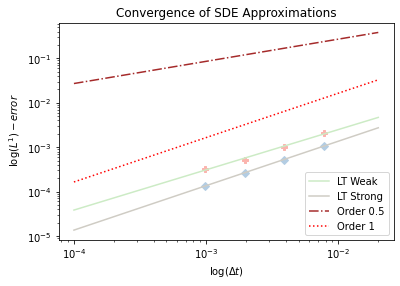

In [21]:
pal = ["#FBB4AE","#B3CDE3", "#CCEBC5","#CFCCC4"]
Dt=[2**(-10),2**(-9),2**(-8),2**(-7)]
plt.loglog(Dt , Err_strong ,'P', color=pal[0])
plt.loglog(Dt , Err_weak,'D', color=pal[1])

x=np.linspace(0.0001,0.02)
#y=(reg1.coef_[0])*x + reg1.intercept_
y = np.exp(reg1.intercept_) * x**reg1.coef_
z = np.exp(reg2.intercept_) * x**reg2.coef_
s = np.exp(1) * x**(0.5)
r = np.exp(0.5) * x**(1)
plt.loglog(x, y, color=pal[2], label='Strang Weak')
plt.loglog(x, z, color=pal[3], label='LT Strong')
plt.loglog(x, s, 'g-.' , color='brown', label='Order 0.5')
plt.loglog(x, r, ':' , color='red', label= 'Order 1')


plt.title('Convergence of SDE Approximations')
plt.xlabel('$\log(\Delta t)$'); plt.ylabel(' $\log(L^{1})-error$');plt.legend(loc=4)

plt.show()     